# **Segundo Relatório Do Projeto Integrador**
  
Curso de Ciencia de Dados  
Fatec Votorantim  
**Grupo 07** - G.E.I Flow  
Nov/2024

---
# **Objetivo:**  

**Objetivos Gerais**: praticar a manipulação, validação, limpeza e visualização de dados (finalidade pedagógica).

**Objetivos Secundários:**  explorar os indicadores financeiros de cada cliente e produto ofertado pela empresa, assim como gerar insights para possíveis estratégias de preços e custos afim de aumentar a lucratividade do negócio. 

Para isso, utilizar-se-á a análise PVM (Preço, Volume e Mix). Esta ferramenta de análise é utlizada em ambientes de negócio para identificar o impacto dos indicadores de preço, volume e mix nos resultados organizacionais. Para este trabalho, será utilizado apenas os impactos de preços para se gerar os insights.



---
## **Tabela de dados  - Departamento de Análise de Vendas**  

A tabela de dados utilizada para este projeto possui 470 registros e 26 colunas obtido através do departamento de vendas de uma empresa multinacional de Sorocaba. Os nomes de clientes e produtos foram ajustados para evitar o compartilhamento de dados sensíveis.


## **Dimensões de Clientes e Produtos**:
  * **Id Cliente:** representa o código individual de cada cliente;
  * **Matriz do Cliente:** representa o nome do grupo empresarial a qual os clientes fazem parte. Ou seja, um único grupo comercial pode ter vários nomes de cliente relacionados;
  * **Região**: define a região onde está localizado o cliente;
  * **Categoria de Produto**: define as marcas de cada produto;
  * **Id do Produto**: representa o código individual dos produtos;
  * **Projeto**: dimensão criada para representar grupo de projetos estratégicos que precisam ser analisados individualmente.
    



# 1 - Etapa de Extração dos dados

In [57]:
# Importação dos dados via pandas

import pandas as pd
#  carregar o arquivo com via cvs
df = pd.read_csv(
    r'C:\Users\ThinkPad\Desktop\FATEC\Semestre 1\Projeto Integrador\base_vendas_01.csv',
    sep=","
)

# 2 - Etapa de Transformação dos dados

In [58]:
# Visualização do data frame (df).

df.head()

,Projeto,Regiao,Matriz do cliente,Id do cliente,Categoria de produto,Id do Produto,Quantidade Atual 2022,Quantidade Atual 2023,Quantidade Plano 2024,Quantidade Plano 2025,...,Vendas Liquidas Plano 2024,Vendas Liquidas Plano 2025,Custo Total Atual 2022,Custo Total Atual 2023,Custo Total Plano 2024,Custo Total Plano 2025,Margem Atual 2022,Margem Atual 2023,Margem Plano 2024,Margem Plano 2025
0,Standard Software,Norte,Tech Solution,4911 - Tech Analytics,Premium,A0008014240952,5544,0,0,0,...,0.00,0.00,15818.21,0.00,0.00,0.00,5017.14,0.00,0.00,0.00
1,Standard Software,Norte,Tech Solution,4911 - Tech Analytics,Premium,A0008802370941,5472,0,0,0,...,0.00,0.00,23134.47,0.00,0.00,0.00,5111.38,-21.57,0.00,0.00
2,Standard Software,Norte,Tech Solution,4911 - Tech Analytics,Premium,A0008799120936,22680,0,0,0,...,0.00,0.00,14665.70,0.00,0.00,0.00,6153.55,-729.88,0.00,0.00
3,Standard Software,Norte,Tech Solution,1764 - Tech Analytics,Analytics,A0008943210597,8160,16320,11040,6427,...,36858.55,21511.06,3104.66,6035.14,4300.33,2503.42,24138.61,48451.41,32558.22,19007.64
4,Standard Software,Norte,Tech Solution,1764 - Tech Analytics,Analytics,A0008140070828,12906,13440,3840,2060,...,10821.81,5805.45,8149.54,7552.05,2095.89,1124.33,28206.65,30308.43,8725.92,4681.12


In [59]:
#Estatística Descritiva através da função "Describe". 

df.describe()



,Quantidade Atual 2022,Quantidade Atual 2023,Quantidade Plano 2024,Quantidade Plano 2025,Preco Atual 2022,Preco Atual 2023,Preco Plano 2024,Preco Plano 2025,Vendas Liquidas Atual 2022,Vendas Liquidas Atual 2023,Vendas Liquidas Plano 2024,Vendas Liquidas Plano 2025,Custo Total Atual 2022,Custo Total Atual 2023,Custo Total Plano 2024,Custo Total Plano 2025,Margem Atual 2022,Margem Atual 2023,Margem Plano 2024,Margem Plano 2025
count,4.710000e+02,4.710000e+02,471.000000,4.710000e+02,471.000000,471.000000,471.000000,471.000000,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,471.000000,4.710000e+02,471.000000
mean,9.722637e+03,1.086485e+04,7613.154989,7.442399e+03,10.656369,9.211592,19.707155,20.465754,5.467655e+04,5.231195e+04,5.837067e+04,5.689559e+04,4.173011e+04,3.925687e+04,4.342687e+04,4.242351e+04,1.294644e+04,13055.080849,1.494380e+04,14472.076221
std,9.614171e+04,1.168530e+05,63945.818717,6.927090e+04,35.383251,34.242104,51.003772,55.666179,3.420666e+05,2.792019e+05,3.221273e+05,3.145975e+05,2.572199e+05,2.088374e+05,2.357730e+05,2.343730e+05,9.300346e+04,98476.345944,1.039551e+05,95843.567716
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-4.930910e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.957874e+05,-829322.540000,-5.046850e+05,-475984.530000
25%,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,2.000000e+00,0.000000e+00,50.000000,5.000000e+01,0.400000,0.000000,0.770000,0.950000,1.463000e+01,0.000000e+00,1.209100e+02,1.446500e+02,3.710000e+00,0.000000e+00,6.618000e+01,7.481000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,5.940000e+02,4.650000e+02,952.500000,8.000000e+02,2.615000,2.145000,3.830000,5.040000,2.455935e+03,2.931700e+03,6.764385e+03,4.389650e+03,2.015215e+03,2.542905e+03,4.744935e+03,3.154225e+03,3.654950e+02,164.845000,8.240950e+02,581.835000
max,1.614928e+06,1.906352e+06,987840.000000,1.100000e+06,284.710000,292.170000,314.840000,419.040000,4.174330e+06,2.725548e+06,3.414695e+06,3.433159e+06,3.412389e+06,2.003601e+06,2.418150e+06,2.671480e+06,1.188639e+06,844714.520000,1.262401e+06,966343.160000


<span style="color:red">Em função da presença de zeros no dataframe, faz-se necessário substituir por NaN para que possamos corretamente realizar a estatística descritiva dos dados.</span>

In [60]:
# Substituir os valores "Zero" por "NaN" usando o Numpy. 

import numpy as np
df.replace(0, np.nan, inplace=True)
df.describe().round(1).astype(float)


,Quantidade Atual 2022,Quantidade Atual 2023,Quantidade Plano 2024,Quantidade Plano 2025,Preco Atual 2022,Preco Atual 2023,Preco Plano 2024,Preco Plano 2025,Vendas Liquidas Atual 2022,Vendas Liquidas Atual 2023,Vendas Liquidas Plano 2024,Vendas Liquidas Plano 2025,Custo Total Atual 2022,Custo Total Atual 2023,Custo Total Plano 2024,Custo Total Plano 2025,Margem Atual 2022,Margem Atual 2023,Margem Plano 2024,Margem Plano 2025
count,238.0,227.0,261.0,281.0,238.0,227.0,261.0,281.0,240.0,232.0,261.0,281.0,238.0,227.0,255.0,277.0,240.0,232.0,261.0,281.0
mean,19241.0,22543.4,13738.7,12474.6,21.1,19.1,35.6,34.3,107302.7,106202.3,105335.6,95365.9,82583.5,81453.7,80212.0,72135.3,25407.4,26504.1,26967.5,24257.5
std,134709.1,167726.9,85482.7,89395.5,47.6,47.4,64.3,68.7,473742.5,390971.9,427329.9,403049.7,357518.4,295376.8,316068.3,302308.4,129196.9,139187.0,138598.8,123211.7
min,1.0,2.0,1.0,7.0,0.1,0.1,0.1,0.1,3.4,-4930.9,5.4,7.7,1.5,1.2,10.8,8.1,-195787.4,-829322.5,-504685.0,-475984.5
25%,119.2,144.5,162.0,103.0,1.2,1.1,1.1,1.1,449.4,264.1,696.3,332.6,317.2,208.5,441.7,258.1,2.4,0.4,-16.0,-6.4
50%,576.0,500.0,666.0,510.0,2.6,2.2,2.8,2.7,2407.3,3061.3,4581.8,2545.4,1947.9,2872.4,3820.0,2085.1,298.6,170.5,431.6,211.9
75%,4163.8,5141.0,3000.0,2040.0,17.0,11.5,29.1,25.7,20138.3,14924.0,32703.3,21633.1,16606.6,12819.2,28432.0,17245.3,2970.1,3170.9,6347.2,4285.6
max,1614928.0,1906352.0,987840.0,1100000.0,284.7,292.2,314.8,419.0,4174330.5,2725548.4,3414694.8,3433159.3,3412388.8,2003601.0,2418149.9,2671480.0,1188638.7,844714.5,1262400.7,966343.2


<span style="color:green">**É possível observar que as médias dos preços foram ajustadas após a realização da limpeza dos dados.**</span>

In [61]:
df.info()

# Através da função "info()" é possível verificar a presença de alguns registros "inconsistentes", como por eemplo as as quantidades e vendas para o ano de 2022. 

# Ou seja, existem regristros na tabela em questão para o ano de 2022 em que não há quantidade e preço mas há vendas. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Projeto                     471 non-null    object 
 1   Regiao                      471 non-null    object 
 2   Matriz do cliente           471 non-null    object 
 3   Id do cliente               471 non-null    object 
 4   Categoria de produto        471 non-null    object 
 5   Id do Produto               471 non-null    object 
 6   Quantidade Atual 2022       238 non-null    float64
 7   Quantidade Atual 2023       227 non-null    float64
 8   Quantidade Plano 2024       261 non-null    float64
 9   Quantidade Plano 2025       281 non-null    float64
 10  Preco Atual 2022            238 non-null    float64
 11  Preco Atual 2023            227 non-null    float64
 12  Preco Plano 2024            261 non-null    float64
 13  Preco Plano 2025            281 non

In [62]:
# Inserção de novas colunnas para idenfiticar o custo unitário 

# Custo unitário = Custo Total / Quantidade , onde Quantidade é diferente de zero.

# Custo Unitário 2022
df['Custo Unit. 2022'] = df.apply(
    lambda row: row['Custo Total Atual 2022'] / row['Quantidade Atual 2022'] 
    if row['Quantidade Atual 2022'] != 0 else 0, 
    axis=1
)

# Custo Unitário 2023
df['Custo Unit. 2023'] = df.apply(
    lambda row: row['Custo Total Atual 2023'] / row['Quantidade Atual 2023'] 
    if row['Quantidade Atual 2023'] != 0 else 0, 
    axis=1
)

# Custo Unitário 2024
df['Custo Unit. 2024'] = df.apply(
    lambda row: row['Custo Total Plano 2024'] / row['Quantidade Plano 2024'] 
    if row['Quantidade Plano 2024'] != 0 else 0, 
    axis=1
)

# Custo Unitário 2025
df['Custo Unit. 2025'] = df.apply(
    lambda row: row['Custo Total Plano 2025'] / row['Quantidade Plano 2025'] 
    if row['Quantidade Plano 2025'] != 0 else 0, 
    axis=1
)

## Inserção das colunas "Mix Status" para evitar erros na análise MVP.

In [63]:
# Status de MIX 23 vs 22
df['Mix Status 23 vs 22'] = df.apply(
    lambda row: 'MIX' if row['Quantidade Atual 2023'] == 0 or row['Quantidade Atual 2022'] == 0 else 'NOT MIX', 
    axis=1
)

# Status de MIX 24 vs 23
df['Mix Status 24 vs 23'] = df.apply(
    lambda row: 'MIX' if row['Quantidade Plano 2024'] == 0 or row['Quantidade Atual 2023'] == 0 else 'NOT MIX', 
    axis=1
)

# Status de MIX 25 vs 24
df['Mix Status 25 vs 24'] = df.apply(
    lambda row: 'MIX' if row['Quantidade Plano 2025'] == 0 or row['Quantidade Plano 2024'] == 0 else 'NOT MIX', 
    axis=1
)


## Inserção de colunas de impacto de preço.

In [64]:

 # Add a new column with the condition for Price Impact, excluding MIX rows
df['Impacto de Preco 23 vs 22'] = df.apply(
    lambda row: row['Quantidade Atual 2023'] * (row['Preco Atual 2023'] - row['Preco Atual 2022'])
    if row['Mix Status 23 vs 22'] != 'MIX' else 0, 
    axis=1
)
 # Add a new column with the condition for Price Impact, excluding MIX rows
df['Impacto de Preco 24 vs 23'] = df.apply(
    lambda row: row['Quantidade Plano 2024'] * (row['Preco Plano 2024'] - row['Preco Atual 2023'])
    if row['Mix Status 24 vs 23'] != 'MIX' else 0, 
    axis=1
)
 # Add a new column with the condition for Price Impact, excluding MIX rows
df['Impacto de Preco 25 vs 24'] = df.apply(
    lambda row: row['Quantidade Plano 2025'] * (row['Preco Plano 2025'] - row['Preco Plano 2024'])
    if row['Mix Status 25 vs 24'] != 'MIX' else 0, 
    axis=1
)


In [65]:
# Validar se novas colunas foram adicionados ao modelo
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Projeto                     471 non-null    object 
 1   Regiao                      471 non-null    object 
 2   Matriz do cliente           471 non-null    object 
 3   Id do cliente               471 non-null    object 
 4   Categoria de produto        471 non-null    object 
 5   Id do Produto               471 non-null    object 
 6   Quantidade Atual 2022       238 non-null    float64
 7   Quantidade Atual 2023       227 non-null    float64
 8   Quantidade Plano 2024       261 non-null    float64
 9   Quantidade Plano 2025       281 non-null    float64
 10  Preco Atual 2022            238 non-null    float64
 11  Preco Atual 2023            227 non-null    float64
 12  Preco Plano 2024            261 non-null    float64
 13  Preco Plano 2025            281 non

## 3 - Análise descritiva dos dados de vendas e impacto de preços

**Distribuição de vendas Líquidas por projetos**

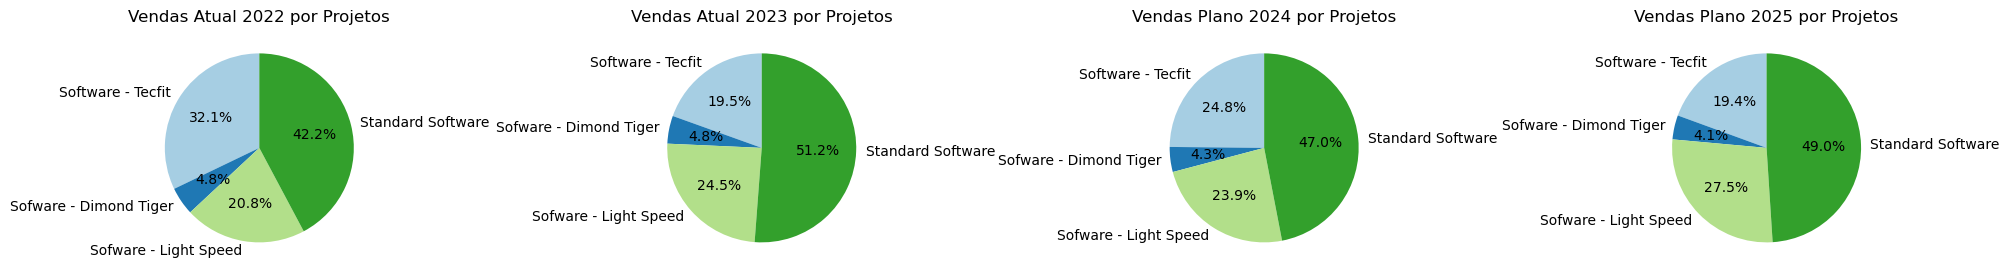

In [66]:
# Exemplo de agrupamento para 2023 e 2024
import matplotlib.pyplot as plt

agrupamento_2022 = df.groupby('Projeto')['Vendas Liquidas Atual 2022'].sum()
agrupamento_2023 = df.groupby('Projeto')['Vendas Liquidas Atual 2023'].sum()
agrupamento_2024 = df.groupby('Projeto')['Vendas Liquidas Plano 2024'].sum()
agrupamento_2025 = df.groupby('Projeto')['Vendas Liquidas Plano 2025'].sum()

# Criar subplots com 1 linha e 4 colunas (para 2022 a 2025)
fig, axes = plt.subplots(1,4, figsize=(20, 8))  # 1 linha, 2 colunas

# Gráfico de pizza para o ano de 2022
axes[0].pie(
    agrupamento_2022,
    labels=agrupamento_2022.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
axes[0].set_title('Vendas Atual 2022 por Projetos')

# Gráfico de pizza para o ano de 2023
axes[1].pie(
    agrupamento_2023,
    labels=agrupamento_2023.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
axes[1].set_title('Vendas Atual 2023 por Projetos')

# Gráfico de pizza para o ano de 2024
axes[2].pie(
    agrupamento_2024,
    labels=agrupamento_2024.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
axes[2].set_title('Vendas Plano 2024 por Projetos')


# Gráfico de pizza para o ano de 2025
axes[3].pie(
    agrupamento_2025,
    labels=agrupamento_2025.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
axes[3].set_title('Vendas Plano 2025 por Projetos')

# Ajustar layout
plt.tight_layout()
plt.show()


### Vendas por Região: Alta contentração de vendas em na região Norte em comparação ao Sul.

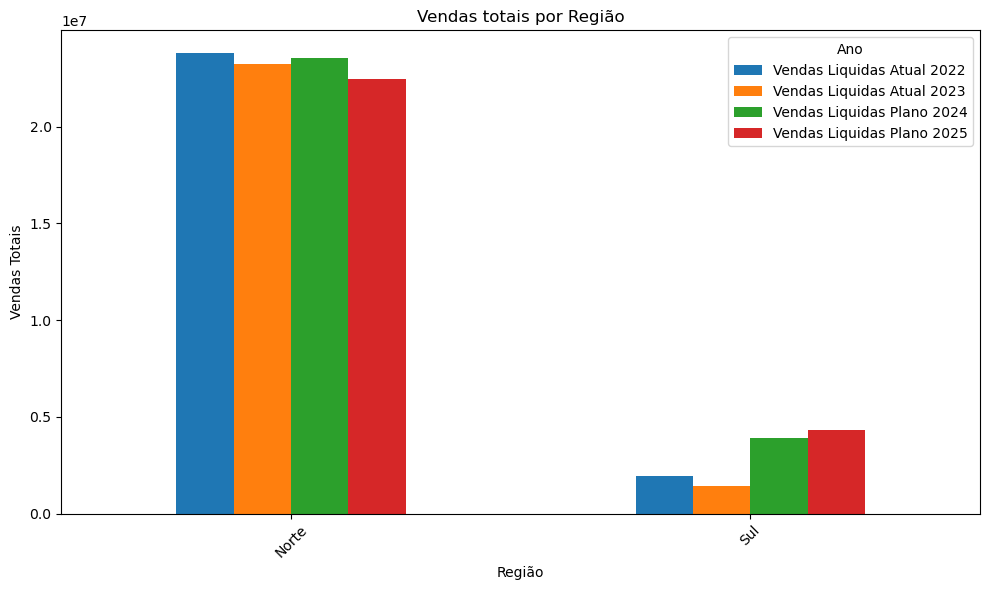

In [82]:
import matplotlib.pyplot as plt
sales_by_region = df.groupby('Regiao')[['Vendas Liquidas Atual 2022', 'Vendas Liquidas Atual 2023', 'Vendas Liquidas Plano 2024','Vendas Liquidas Plano 2025']].sum()
# Plotting
sales_by_region.plot(kind='bar', figsize=(10, 6))
plt.title('Vendas totais por Região')
plt.xlabel('Região')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()
plt.show() 

**Plotagem de 4 gráficos de barra para cada dimensão da tabela para melhorar a usabilidade e clareza da análise.**

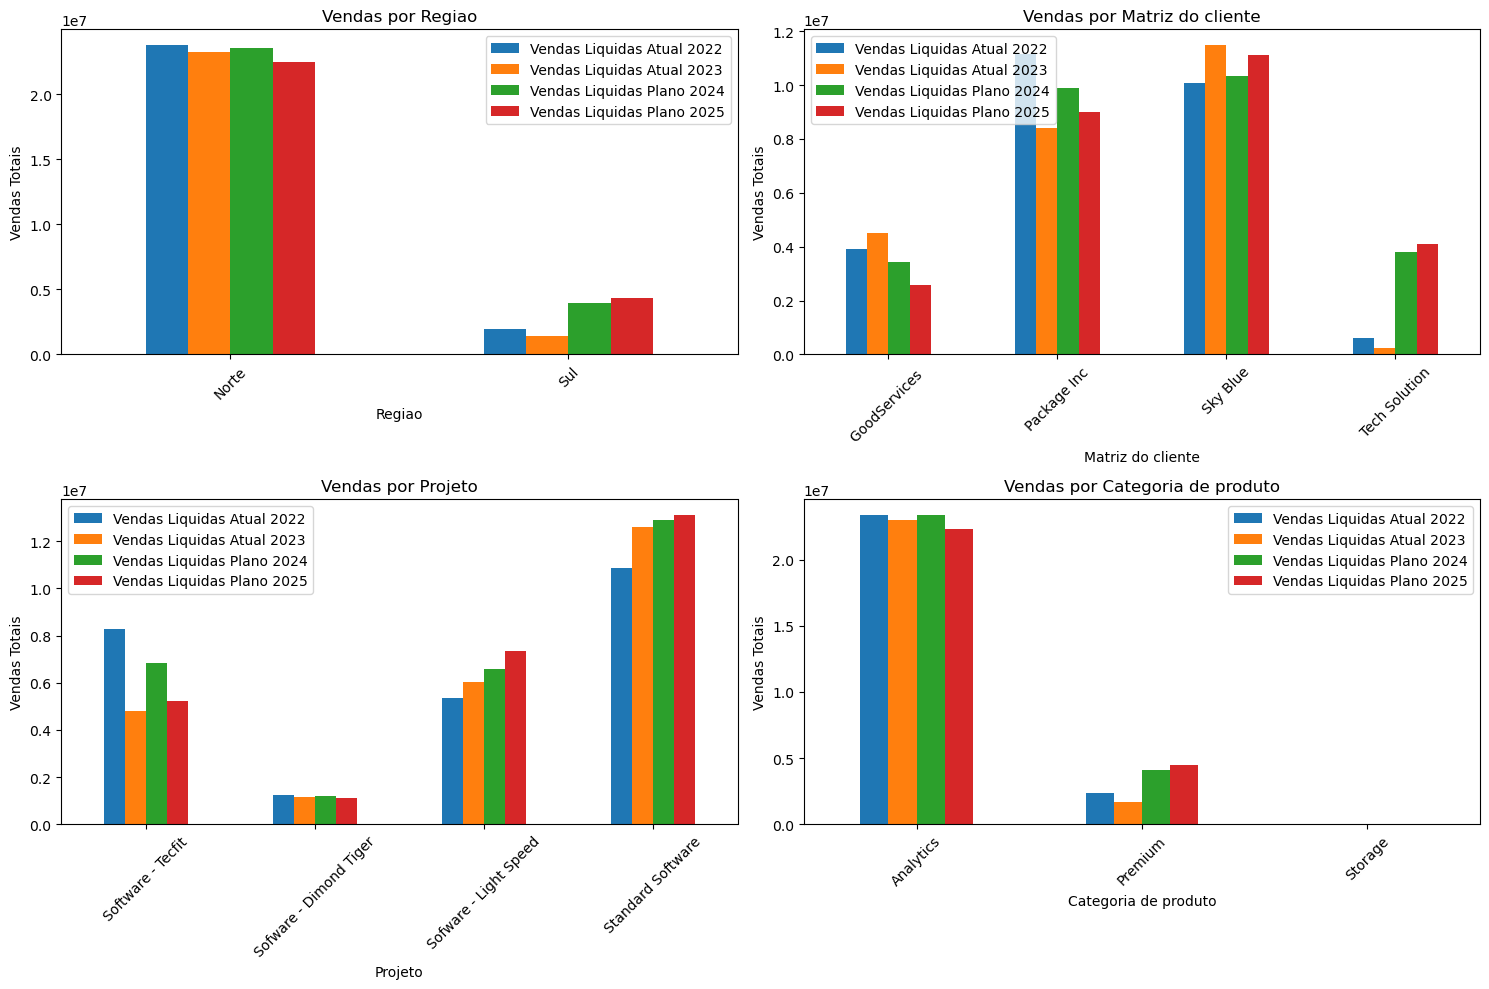

In [74]:
import matplotlib.pyplot as plt
import pandas as pd


# Lista de dimensões a serem analisadas
dimensoes = ['Regiao', 'Matriz do cliente', 'Projeto','Categoria de produto']

# Criação dos gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Transformar a grade em uma lista para indexar

for i, dimensao in enumerate(dimensoes):
    if i >= len(axes):  # Evitar erros caso haja mais dimensões que espaços disponíveis
        break

    # Agrupar e somar os dados por dimensão
    vendas_por_dimensao = df.groupby(dimensao)[['Vendas Liquidas Atual 2022', 
                                                'Vendas Liquidas Atual 2023', 
                                                'Vendas Liquidas Plano 2024',
                                                'Vendas Liquidas Plano 2025']].sum()
    
    # Plotar o gráfico na posição correspondente
    vendas_por_dimensao.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Vendas por {dimensao}')
    axes[i].set_xlabel(dimensao)
    axes[i].set_ylabel('Vendas Totais')
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


**Através dos dados acima pode-se inferir as seguintes proposições:**
1. A região norte possuir a maioria das vendas em comparação ao Sul. No entanto, a região sul é a que indica maior crescimento ano a ano;
2. A matriz de cliente Tech Solution é o grupo comercial com maior crescimento nos ultimos anos;
3. O projeto "Software - Light Speed" e o "Standard Software" são os projetos com maior receita e crescimento de vendas. Já o Tecfit  demonstra uma variabilidade ano a ano. Por fim, o Dimond Tiger demonstra uma baixa participação nas vendas em comparação aos outros projetos;
4. A categoria Analytics possui maioria das vendas, enquanto que a Storage reflete baixíssimas vendas no período. A categoria Premium, por outro lado, indica um crescimento de vendas.

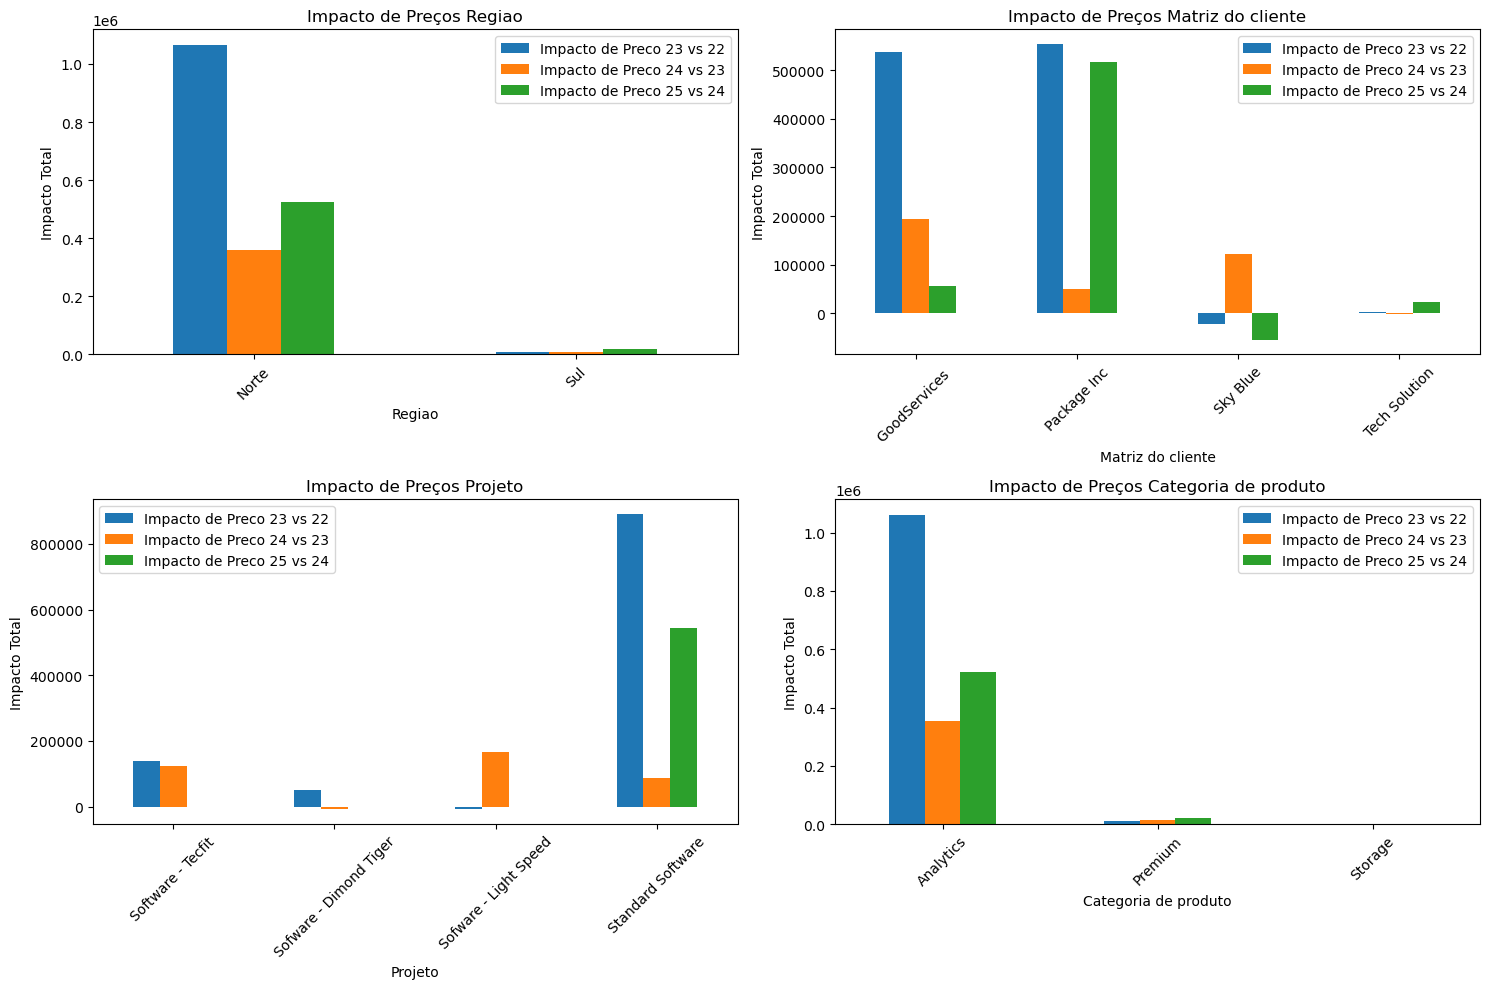

In [79]:
import matplotlib.pyplot as plt
import pandas as pd


# Lista de dimensões a serem analisadas
dimensoes = ['Regiao', 'Matriz do cliente', 'Projeto','Categoria de produto']

# Criação dos gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Transformar a grade em uma lista para indexar

for i, dimensao in enumerate(dimensoes):
    if i >= len(axes):  # Evitar erros caso haja mais dimensões que espaços disponíveis
        break

    # Agrupar e somar os dados por dimensão
    vendas_por_dimensao = df.groupby(dimensao)[['Impacto de Preco 23 vs 22', 
                                                'Impacto de Preco 24 vs 23', 
                                                'Impacto de Preco 25 vs 24']].sum()
    
    # Plotar o gráfico na posição correspondente
    vendas_por_dimensao.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Impacto de Preços {dimensao}')
    axes[i].set_xlabel(dimensao)
    axes[i].set_ylabel('Impacto Total')
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


**Através dos dados acima pode-se inferir as seguintes proposições:**
1. Considerando os impactos de precos evidenciados acima, é possível notar à primeira vista que há pouca relação entre os preços e as vendas totais do período.
2. A estratégia da empresa de preços para 2024 e 2025 é de um aumento menor quando comparado ao ano de 2022. Essa redução no aumento de preços pode estar relacionada ao efeito pós covid que ocorreu em 2022 e à retração dos aumentos de custos nos anos de 2023 e 2024.